In [58]:
import pandas as pd

df = pd.read_csv("Cereals.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [59]:
#checking which columns have missing values
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [60]:
# dropping missing values
df = df.dropna(axis = 0)

In [61]:
#checking if missing values are dropped
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [62]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [63]:
df["calories"].describe()


count     74.000000
mean     107.027027
std       19.843893
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

In [64]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [65]:
df_scaled = df.copy()

In [66]:
df_with_non_norm_variables = df.drop(columns = ['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'weight', 'cups',
       'rating'])

df_with_non_norm_variables

,name,mfr,type,vitamins,shelf
0,100%_Bran,N,C,25,3
1,100%_Natural_Bran,Q,C,0,3
2,All-Bran,K,C,25,3
3,All-Bran_with_Extra_Fiber,K,C,25,3
5,Apple_Cinnamon_Cheerios,G,C,25,1
...,...,...,...,...,...
72,Triples,G,C,25,3
73,Trix,G,C,25,2
74,Wheat_Chex,R,C,25,1
75,Wheaties,G,C,25,1


In [67]:

#removing columns which do not require normalizing

df_scaled = df_scaled.drop(columns = ['name', 'mfr', 'type', 'vitamins', 'shelf'])
df_scaled

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,1.0,0.50,93.704912
5,110,2,2,180,1.5,10.5,10.0,70.0,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3.0,60.0,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12.0,25.0,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3.0,115.0,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3.0,110.0,1.0,1.00,51.592193


In [68]:
df_scaled.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'weight', 'cups', 'rating'],
      dtype='object')

In [69]:
df_scaled['protein'] = (df_scaled['protein']- df_scaled['protein'].min()) / (df_scaled['protein'].max() - df_scaled['protein'].min()) 

In [70]:
df_scaled['calories'] = (df_scaled['calories']- df_scaled['calories'].min()) / (df_scaled['calories'].max() - df_scaled['calories'].min()) 

In [71]:
df_scaled['fat'] = (df_scaled['fat']- df_scaled['fat'].min()) / (df_scaled['fat'].max() - df_scaled['fat'].min()) 

In [72]:
df_scaled['sodium'] = (df_scaled['sodium']- df_scaled['sodium'].min()) / (df_scaled['sodium'].max() - df_scaled['sodium'].min()) 

In [73]:
df_scaled['fiber'] = (df_scaled['fiber']- df_scaled['fiber'].min()) / (df_scaled['fiber'].max() - df_scaled['fiber'].min()) 

In [74]:
df_scaled['carbo'] = (df_scaled['carbo']- df_scaled['carbo'].min()) / (df_scaled['carbo'].max() - df_scaled['carbo'].min()) 

In [75]:
df_scaled['sugars'] = (df_scaled['sugars']- df_scaled['sugars'].min()) / (df_scaled['sugars'].max() - df_scaled['sugars'].min()) 

In [76]:
df_scaled['potass'] = (df_scaled['potass']- df_scaled['potass'].min()) / (df_scaled['potass'].max() - df_scaled['potass'].min()) 

In [77]:
df_scaled['weight'] = (df_scaled['weight']- df_scaled['weight'].min()) / (df_scaled['weight'].max() - df_scaled['weight'].min()) 

In [78]:
df_scaled['cups'] = (df_scaled['cups']- df_scaled['cups'].min()) / (df_scaled['cups'].max() - df_scaled['cups'].min()) 

In [79]:
df_scaled['rating'] = (df_scaled['rating']- df_scaled['rating'].min()) / (df_scaled['rating'].max() - df_scaled['rating'].min()) 

In [80]:
df_scaled.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,rating
0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.5,0.064,0.665593
1,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.5,0.600,0.210685
2,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.5,0.064,0.546941
3,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.5,0.200,1.000000
5,0.545455,0.2,0.4,0.562500,0.107143,0.305556,0.666667,0.174603,0.5,0.400,0.151551


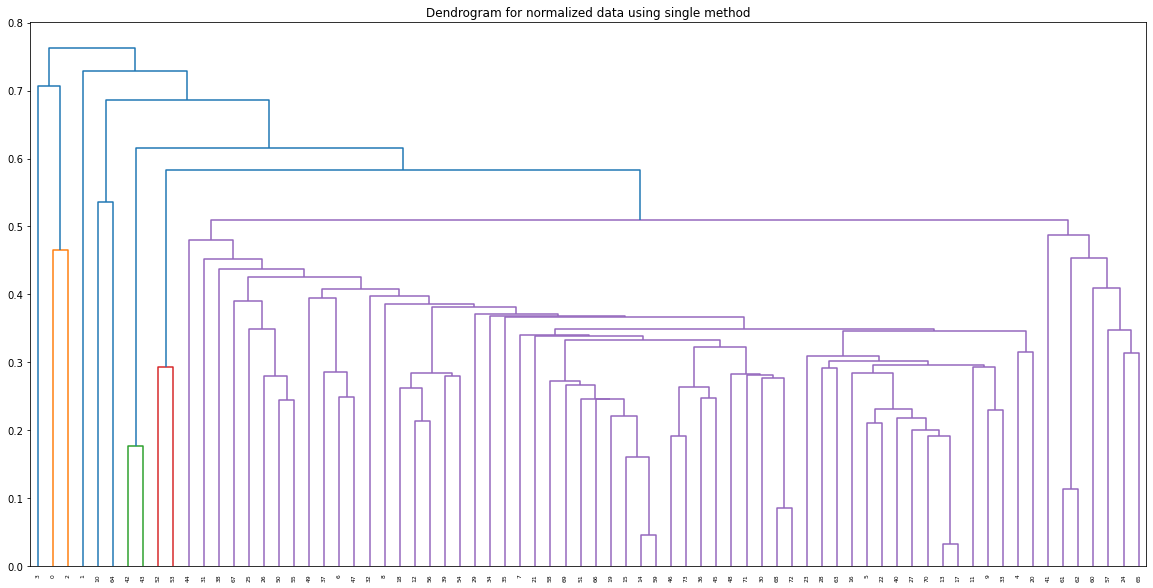

In [81]:
#looking at the dendogram for normalized data usin g single method
plt.figure(figsize=(20, 10))
plt.title("Dendrogram for normalized data using single method")
dendrogram_with_single = shc.dendrogram(shc.linkage(df_scaled, method='single'))
plt.axhline(y=6, color='b', linestyle='--')

In [82]:
#performing clustering with single method
cluster_1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
clf_1 = cluster_1.fit_predict(df_scaled)

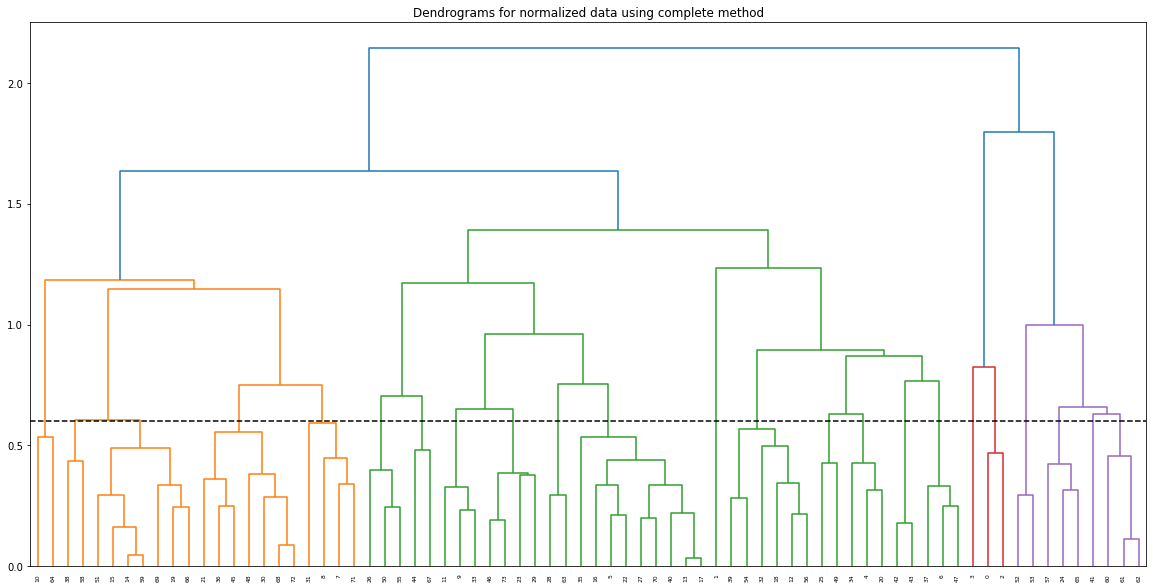

In [91]:
#looking at the dendogram for normalized data using complete method
plt.figure(figsize=(20, 10))
plt.title("Dendrograms for normalized data using complete method")
dendrogram_with_complete = shc.dendrogram(shc.linkage(df_scaled, method='complete'))
plt.axhline(y=0.6, color='k', linestyle='--')
plt.show()

In [84]:
#performing clustering using complete method
cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clf_2 = cluster_2.fit_predict(df_scaled)

In [85]:
#computing cluster-1 centriods
df_scaled.groupby(clf_1).mean()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,rating
0,0.535211,0.290141,0.202817,0.505502,0.128773,0.559468,0.483568,0.236754,0.532113,0.472000,0.303971
1,0.121212,0.600000,0.133333,0.552083,0.785714,0.092593,0.244444,0.936508,0.500000,0.109333,0.737511


In [86]:
#computing cluster-2 centriods
df_scaled.groupby(clf_2).mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,rating
0,0.250000,0.366667,0.050000,0.141927,0.309524,0.453704,0.177778,0.414021,0.402500,0.386667,0.630198
1,0.570381,0.290323,0.229032,0.578125,0.125576,0.557348,0.531183,0.236303,0.555645,0.470968,0.261809
